<a href="https://colab.research.google.com/github/greenmantice18/Internship-AIML/blob/main/SVR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **SVR EXAMPLE**

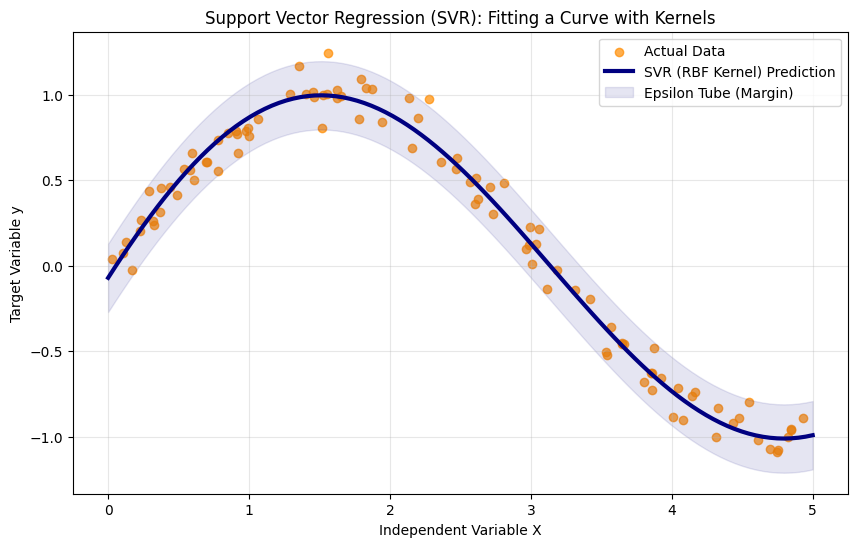

SVR Model MSE: 0.00865
Number of Support Vectors: 48


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

# 1. GENERATE SYNTHETIC NON-LINEAR DATA
# Creating a curvy relationship that a straight line couldn't fit
np.random.seed(42)
X = np.sort(5 * np.random.rand(100, 1), axis=0)
y = np.sin(X).ravel() + np.random.normal(0, 0.1, X.shape[0])

# 2. FEATURE SCALING (Mandatory for SVR)
# SVR uses distances (kernels); scaling ensures all features contribute equally
scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y.reshape(-1, 1)).ravel()

# 3. INITIALIZE AND TRAIN THE SVR MODEL
# 'rbf' (Radial Basis Function) is the most powerful kernel for non-linear data
# C: Penalty parameter (Trade-off between error and smoothness)
# epsilon: The width of the "no-penalty" tube
svr_rbf = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=0.1)
svr_rbf.fit(X_scaled, y_scaled)

# 4. PREDICTION AND INVERSE SCALING
# To plot, we must transform the scaled predictions back to original units
X_grid = np.linspace(0, 5, 100).reshape(-1, 1)
X_grid_scaled = scaler_X.transform(X_grid)
y_pred_scaled = svr_rbf.predict(X_grid_scaled)
y_pred = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1))

# 5. VISUALIZATION
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='darkorange', label='Actual Data', alpha=0.7)
plt.plot(X_grid, y_pred, color='navy', lw=3, label='SVR (RBF Kernel) Prediction')

# Visualizing the Epsilon Tube (Conceptual)
plt.fill_between(X_grid.ravel(),
                 (y_pred.ravel() - 0.2),
                 (y_pred.ravel() + 0.2),
                 color='navy', alpha=0.1, label='Epsilon Tube (Margin)')

plt.title("Support Vector Regression (SVR): Fitting a Curve with Kernels")
plt.xlabel("Independent Variable X")
plt.ylabel("Target Variable y")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# 6. MODEL PERFORMANCE
mse = mean_squared_error(y, scaler_y.inverse_transform(svr_rbf.predict(X_scaled).reshape(-1, 1)))
print(f"SVR Model MSE: {mse:.5f}")
print(f"Number of Support Vectors: {len(svr_rbf.support_)}")

# **KERNAl FUNCTION IN SVR**

/tmp/ipython-input-1102250245.py:67: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts.index, y=counts.values, ax=ax2, palette='viridis')


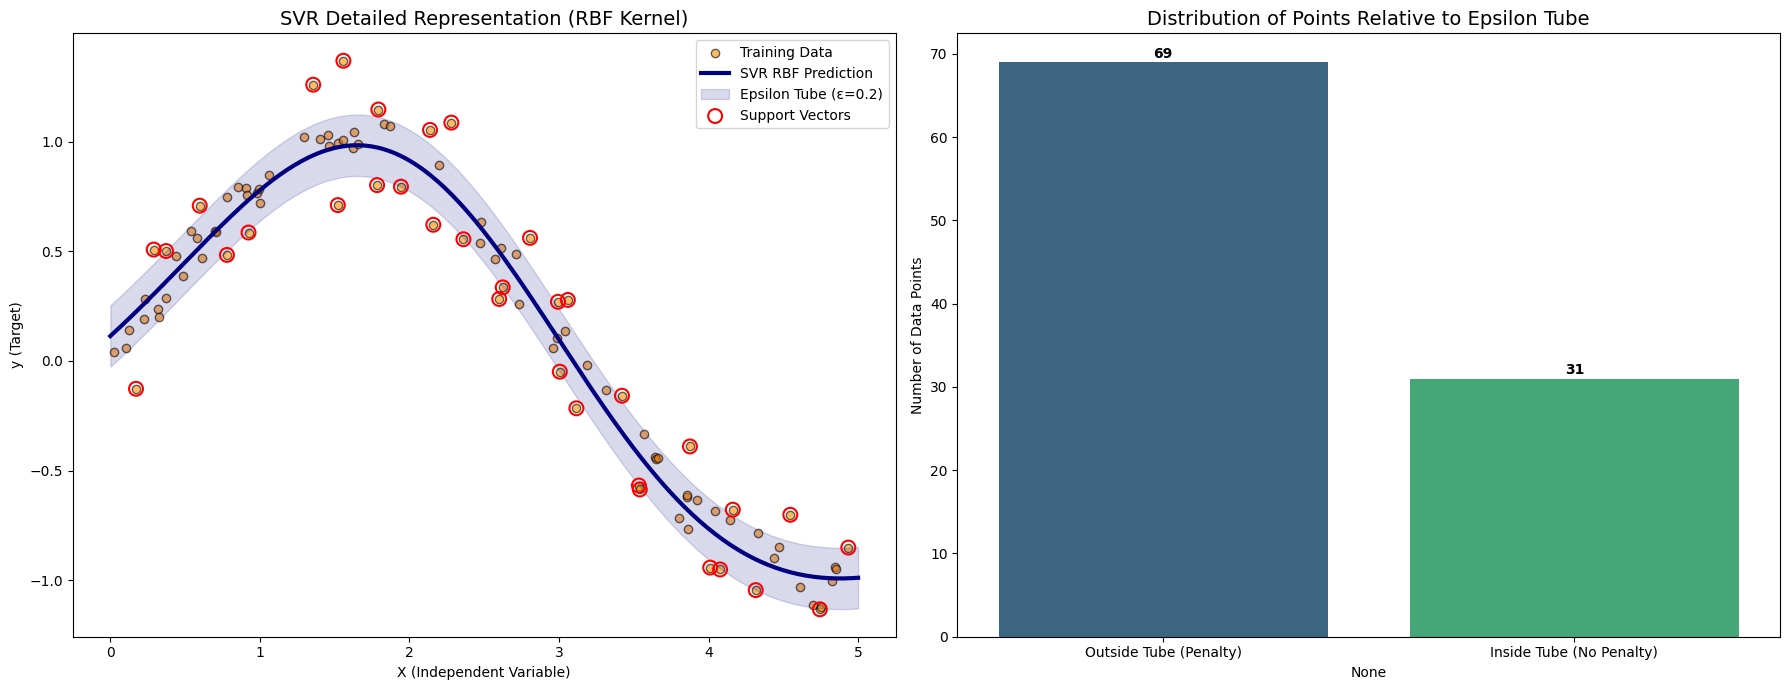

Total Points: 100
Total Support Vectors: 34
MSE: 0.0193


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

# 1. GENERATE NON-LINEAR DATA
np.random.seed(42)
X = np.sort(5 * np.random.rand(100, 1), axis=0)
y = np.sin(X).ravel() + np.random.normal(0, 0.15, X.shape[0])

# 2. FEATURE SCALING (Mandatory for SVR)
scaler_X = StandardScaler()
scaler_y = StandardScaler()
X_s = scaler_X.fit_transform(X)
y_s = scaler_y.fit_transform(y.reshape(-1, 1)).ravel()

# 3. TRAIN SVR WITH RBF KERNEL
# C=100 (high penalty for error), epsilon=0.2 (width of the tube)
epsilon_val = 0.2
model = SVR(kernel='rbf', C=100, gamma=0.5, epsilon=epsilon_val)
model.fit(X_s, y_s)

# 4. PREPARE PLOTTING DATA
X_grid = np.linspace(0, 5, 200).reshape(-1, 1)
y_pred_s = model.predict(scaler_X.transform(X_grid))
y_pred = scaler_y.inverse_transform(y_pred_s.reshape(-1, 1)).ravel()

# Calculate the Tube Margins in the original scale
# Standard deviation is used to scale epsilon back to the original y-units
y_upper = y_pred + (epsilon_val * np.std(y))
y_lower = y_pred - (epsilon_val * np.std(y))

# Calculate Residuals for the Bar Plot
y_train_pred = scaler_y.inverse_transform(model.predict(X_s).reshape(-1, 1)).ravel()
residuals = y - y_train_pred

# ==========================================
# 5. VISUALIZATION
# ==========================================
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 7))

# --- Plot 1: The Regression Curve & Epsilon Tube ---
ax1.scatter(X, y, color='darkorange', edgecolors='k', alpha=0.6, label='Training Data')
ax1.plot(X_grid, y_pred, color='navy', lw=3, label='SVR RBF Prediction')

# Draw the Epsilon-Insensitive Tube
ax1.fill_between(X_grid.ravel(), y_lower, y_upper, color='navy', alpha=0.15, label=f'Epsilon Tube (ε={epsilon_val})')

# Highlight Support Vectors
sv_idx = model.support_
ax1.scatter(X[sv_idx], y[sv_idx], s=100, facecolors='none', edgecolors='red', linewidths=1.5, label='Support Vectors')

ax1.set_title("SVR Detailed Representation (RBF Kernel)", fontsize=14)
ax1.set_xlabel("X (Independent Variable)")
ax1.set_ylabel("y (Target)")
ax1.legend()

# --- Plot 2: Residual Analysis (Bar/Dist Plot) ---
# We categorize residuals as "Inside Tube" or "Outside Tube"
inside_tube = np.abs(residuals) <= (epsilon_val * np.std(y))
counts = pd.Series(inside_tube).value_counts()
counts.index = ['Outside Tube (Penalty)', 'Inside Tube (No Penalty)']

sns.barplot(x=counts.index, y=counts.values, ax=ax2, palette='viridis')
ax2.set_title("Distribution of Points Relative to Epsilon Tube", fontsize=14)
ax2.set_ylabel("Number of Data Points")

for i, v in enumerate(counts.values):
    ax2.text(i, v + 0.5, str(v), ha='center', fontweight='bold')

plt.tight_layout()
plt.show()

# ==========================================
# 6. SUMMARY STATS
# ==========================================
print(f"Total Points: {len(X)}")
print(f"Total Support Vectors: {len(sv_idx)}")
print(f"MSE: {mean_squared_error(y, y_train_pred):.4f}")